In [205]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
from MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi

In [ ]:
historical_start_date = dt.datetime(2016,8,1)
historical_end_date = dt.datetime(2021,7,31)

ADA_df = web.DataReader('ADA-USD','yahoo',historical_start_date,historical_end_date)
BCH_df = web.DataReader('BCH-USD','yahoo',historical_start_date,historical_end_date)
BNB_df = web.DataReader('BNB-USD','yahoo',historical_start_date,historical_end_date)
BTC_df = web.DataReader('BTC-USD','yahoo',historical_start_date,historical_end_date)
DOGE_df = web.DataReader('DOGE-USD','yahoo',historical_start_date,historical_end_date)
EOS_df = web.DataReader('EOS-USD','yahoo',historical_start_date,historical_end_date)
ETC_df = web.DataReader('ETC-USD','yahoo',historical_start_date,historical_end_date)
ETH_df = web.DataReader('ETH-USD','yahoo',historical_start_date,historical_end_date)
FIL_df = web.DataReader('FIL-USD','yahoo',historical_start_date,historical_end_date)
LINK_df = web.DataReader('LINK-USD','yahoo',historical_start_date,historical_end_date)
LTC_df = web.DataReader('LTC-USD','yahoo',historical_start_date,historical_end_date)
MKR_df = web.DataReader('MKR-USD','yahoo',historical_start_date,historical_end_date)
THETA_df = web.DataReader('THETA-USD','yahoo',historical_start_date,historical_end_date)
TRX_df = web.DataReader('TRX-USD','yahoo',historical_start_date,historical_end_date)
VET_df = web.DataReader('VET-USD','yahoo',historical_start_date,historical_end_date)
XLM_df = web.DataReader('XLM-USD','yahoo',historical_start_date,historical_end_date)
XMR_df = web.DataReader('XMR-USD','yahoo',historical_start_date,historical_end_date)
XRP_df = web.DataReader('XRP-USD','yahoo',historical_start_date,historical_end_date)
SPX_df = web.DataReader('sp500','fred',historical_start_date,historical_end_date)

ADA_df = ADA_df.loc[~ADA_df.index.duplicated(keep='first')]
BCH_df = BCH_df.loc[~BCH_df.index.duplicated(keep='first')]
BNB_df = BNB_df.loc[~BNB_df.index.duplicated(keep='first')]
BTC_df = BTC_df.loc[~BTC_df.index.duplicated(keep='first')]
DOGE_df = DOGE_df.loc[~DOGE_df.index.duplicated(keep='first')]
EOS_df = EOS_df.loc[~EOS_df.index.duplicated(keep='first')]
ETC_df = ETC_df.loc[~ETC_df.index.duplicated(keep='first')]
ETH_df = ETH_df.loc[~ETH_df.index.duplicated(keep='first')]
FIL_df = FIL_df.loc[~FIL_df.index.duplicated(keep='first')]
LINK_df = LINK_df.loc[~LINK_df.index.duplicated(keep='first')]
LTC_df = LTC_df.loc[~LTC_df.index.duplicated(keep='first')]
MKR_df = MKR_df.loc[~MKR_df.index.duplicated(keep='first')]
THETA_df = THETA_df.loc[~THETA_df.index.duplicated(keep='first')]
TRX_df = TRX_df.loc[~TRX_df.index.duplicated(keep='first')]
VET_df = VET_df.loc[~VET_df.index.duplicated(keep='first')]
XLM_df = XLM_df.loc[~XLM_df.index.duplicated(keep='first')]
XMR_df = XMR_df.loc[~XMR_df.index.duplicated(keep='first')]
XRP_df = XRP_df.loc[~XRP_df.index.duplicated(keep='first')]
SPX_df = SPX_df.loc[~SPX_df.index.duplicated(keep='first')]


In [ ]:
ADA_close_df = ADA_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BCH_close_df = BCH_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BNB_close_df = BNB_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BTC_close_df = BTC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
DOGE_close_df = DOGE_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
EOS_close_df = EOS_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
ETC_close_df = ETC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
ETH_close_df = ETH_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
FIL_close_df = FIL_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
LINK_close_df = LINK_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
LTC_close_df = LTC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
MKR_close_df = MKR_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
THETA_close_df = THETA_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
TRX_close_df = TRX_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
VET_close_df = VET_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XLM_close_df = XLM_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XMR_close_df = XMR_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XRP_close_df = XRP_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
SPX_close_df = SPX_df[['sp500']].rename({'sp500':'sp500 close'}, axis=1).reset_index()


In [ ]:

to_merge_dict = {'ADA': ADA_close_df, 'BCH': BCH_close_df, 'BNB': BNB_close_df, 'BTC': BTC_close_df, 'DOGE': DOGE_close_df, 
                 'EOS': EOS_close_df, 'ETC': ETC_close_df, 'ETH': ETH_close_df, 
                 'FIL': FIL_close_df, 'LINK': LINK_close_df, 'LTC': LTC_close_df, 
                 'MKR': MKR_close_df, 'THETA': THETA_close_df, 'TRX': TRX_close_df,
                 'VET': VET_close_df, 'XLM': XLM_close_df, 'XMR': XMR_close_df, 
                 'XRP': XRP_close_df}
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())
merged_df = merged_df.dropna()
merged_df

In [ ]:
ADA = {'ada': ADA_close_df}
BCH = {'bch': BCH_close_df}
BNB = {'bnb': BNB_close_df}
BTC = {'btc': BTC_close_df}
DOGE = {'doge': DOGE_close_df}
EOS = {'eos': EOS_close_df}
ETC = {'etc': ETC_close_df}
ETH = {'eth': ETH_close_df}
FIL = {'fil': FIL_close_df}
LINK = {'link': LINK_close_df}
LTC = {'ltc': LTC_close_df}
MKR = {'mkr': MKR_close_df}
THETA = {'theta': THETA_close_df}
TRX = {'trx': TRX_close_df}
VET = {'vet': VET_close_df}
XLM = {'xlm': XLM_close_df}
XMR = {'xmr': XMR_close_df}
XRP = {'xrp': XRP_close_df}
SPX = {'spx': SPX_close_df}

    

In [ ]:
ADA_DF=pd.concat(ADA.values(), axis=1, keys=ADA.keys())
BCH_DF=pd.concat(BCH.values(), axis=1, keys=BCH.keys())
BNB_DF=pd.concat(BNB.values(), axis=1, keys=BNB.keys())
BTC_DF=pd.concat(BTC.values(), axis=1, keys=BTC.keys())
DOGE_DF=pd.concat(DOGE.values(), axis=1, keys=DOGE.keys())
EOS_DF=pd.concat(EOS.values(), axis=1, keys=EOS.keys())
ETC_DF=pd.concat(ETC.values(), axis=1, keys=ETC.keys())
ETH_DF=pd.concat(ETH.values(), axis=1, keys=ETH.keys())
FIL_DF=pd.concat(FIL.values(), axis=1, keys=FIL.keys())
LINK_DF=pd.concat(LINK.values(), axis=1, keys=LINK.keys())
LTC_DF=pd.concat(LTC.values(), axis=1, keys=LTC.keys())
MKR_DF=pd.concat(MKR.values(), axis=1, keys=MKR.keys())
THETA_DF=pd.concat(THETA.values(), axis=1, keys=THETA.keys())
TRX_DF=pd.concat(TRX.values(), axis=1, keys=TRX.keys())
VET_DF=pd.concat(VET.values(), axis=1, keys=VET.keys())
XLM_DF=pd.concat(XLM.values(), axis=1, keys=XLM.keys())
XMR_DF=pd.concat(XMR.values(), axis=1, keys=XMR.keys())
XRP_DF=pd.concat(XRP.values(), axis=1, keys=XRP.keys())
SPX_DF=pd.concat(SPX.values(), axis=1, keys=SPX.keys())


In [ ]:
portfolio = [
    ADA_DF,
    BNB_DF,
    BCH_DF,
    BTC_DF,
    DOGE_DF,
    EOS_DF,
    ETC_DF,
    ETH_DF,
    FIL_DF,
    LINK_DF,
    LTC_DF,
    MKR_DF,
    THETA_DF,
    TRX_DF,
    VET_DF,
    XLM_DF,
    XMR_DF,
    XRP_DF,

]


In [212]:
cum_ret = []
for x in portfolio:
    coin_mcsim_equal = MCSimulation(portfolio_data = x, 
                                weights = [1],
                                num_simulation = 10,
                                num_trading_days = 900)

    cumulative_return = coin_mcsim_equal.calc_cumulative_return().mean()
    cum_ret.append(cumulative_return.iloc[-1])

cum_ret_df = pd.DataFrame(cum_ret)
cum_ret_names=cum_ret_df.rename(index={0: 'ADA', 1: 'BCH', 2: 'BNB', 3: 'BTC',4:'DOGE',5:'EOS',6:'ETC',7:'ETH',8:'FIL',9:'LINK',10:'LTC',11:'MKR',12:'THETA',13:'TRX',14:'VET',15:'XLM',16:'XMR',17:'XRP'})
cum_ret_names.columns=['Cumulative Return']
cum_ret_names

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.


,Cumulative Return
ADA,1.555106
BCH,2204.947491
BNB,18.658967
BTC,8.164523
DOGE,5.475652
EOS,9.229147
ETC,2.418321
ETH,13.809984
FIL,0.610642
LINK,0.709839


<AxesSubplot:>

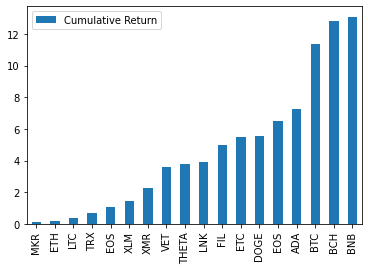

In [211]:
cum_ret_names.sort_values(by=['Cumulative Return']).plot(kind='bar')

In [ ]:
coin_mcsim_equal.plot_simulation()

In [ ]:
cumulative_return.iloc[-1].sort_values()

In [ ]:
cumulative_return

In [ ]:
coin_mcsim_equal.plot_distribution()

In [ ]:
coin_mcsim_equal.summarize_cumulative_return()

In [ ]:
ADA_close_df = ADA_df[['Close']].rename({'Close':'ADA_Close'}, axis=1)
BCH_close_df = BCH_df[['Close']].rename({'Close':'BCH_Close'}, axis=1)
BNB_close_df = BNB_df[['Close']].rename({'Close':'BNB_Close'}, axis=1)
BTC_close_df = BTC_df[['Close']].rename({'Close':'BTC_Close'}, axis=1)
DOGE_close_df = DOGE_df[['Close']].rename({'Close':'DOGE_Close'}, axis=1)
EOS_close_df = EOS_df[['Close']].rename({'Close':'EOS_Close'}, axis=1)
ETC_close_df = ETC_df[['Close']].rename({'Close':'ETC_Close'}, axis=1)
ETH_close_df = ETH_df[['Close']].rename({'Close':'ETH_Close'}, axis=1)
FIL_close_df = FIL_df[['Close']].rename({'Close':'FIL_Close'}, axis=1)
LINK_close_df = LINK_df[['Close']].rename({'Close':'LINK_Close'}, axis=1)
LTC_close_df = LTC_df[['Close']].rename({'Close':'LTC_Close'}, axis=1)
MKR_close_df = MKR_df[['Close']].rename({'Close':'MKR_Close'}, axis=1)
THETA_close_df = THETA_df[['Close']].rename({'Close':'THETA_Close'}, axis=1)
TRX_close_df = TRX_df[['Close']].rename({'Close':'TRX_Close'}, axis=1)
VET_close_df = VET_df[['Close']].rename({'Close':'VET_Close'}, axis=1)
XLM_close_df = XLM_df[['Close']].rename({'Close':'XLM_Close'}, axis=1)
XMR_close_df = XMR_df[['Close']].rename({'Close':'XMR_Close'}, axis=1)
XRP_close_df = XRP_df[['Close']].rename({'Close':'XRP_Close'}, axis=1)
SPX_close_df = SPX_df[['sp500']].rename({'sp500':'SPX_Close'}, axis=1)

select_coin_close_df = pd.concat([ADA_close_df,BCH_close_df,BNB_close_df,BTC_close_df,DOGE_close_df,EOS_close_df,
                                 ETC_close_df,ETH_close_df,FIL_close_df,LINK_close_df,LTC_close_df,MKR_close_df,
                                 THETA_close_df,TRX_close_df,VET_close_df,XLM_close_df,XMR_close_df,XRP_close_df],axis=1).dropna()
display(select_coin_close_df.count())
display(select_coin_close_df)

In [ ]:
coin_daily_returns = select_coin_close_df.pct_change().dropna()
coin_daily_returns

In [ ]:
coin_daily_mean_return = coin_daily_returns.mean()
coin_daily_mean_return

In [ ]:
coin_annual_mean_return = coin_daily_mean_return*select_coin_close_df.count()
coin_annual_mean_return

In [ ]:
coin_annual_std = coin_daily_returns.std()*np.sqrt(select_coin_close_df.count())
coin_annual_std

In [ ]:
coin_sharpe_ratio = coin_annual_mean_return/coin_annual_std
coin_sharpe_ratio

In [ ]:
select_coin_close_df

In [ ]:
spx_coin_close_df = pd.concat([ADA_close_df,BCH_close_df,BNB_close_df,BTC_close_df,DOGE_close_df,EOS_close_df,ETC_close_df,
                               ETH_close_df,FIL_close_df,LINK_close_df,LTC_close_df,MKR_close_df,THETA_close_df,TRX_close_df,
                               VET_close_df,XLM_close_df,XMR_close_df,XRP_close_df,SPX_close_df],axis=1).dropna()
display(spx_coin_close_df.count())
display(spx_coin_close_df)

In [ ]:
spx_coin_daily_returns = spx_coin_close_df.pct_change().dropna()
btc_daily_returns = spx_coin_close_df["BTC_Close"].pct_change().dropna()
btc_daily_returns

In [ ]:
spx_daily_returns = spx_coin_close_df["SPX_Close"].pct_change().dropna()
spx_daily_returns

In [ ]:
spx_variance = spx_daily_returns.var()
spx_variance

In [ ]:
btc_variance = btc_daily_returns.var()
btc_variance

In [ ]:
btc_covariance = btc_daily_returns.cov(spx_daily_returns)
btc_covariance

In [ ]:
BTC_close_df.describe()

In [ ]:
SPX_close_df.describe()